In [532]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pickle as cp



In [563]:
with open('../input/imnames.cp.1', 'rb') as f:
  filtered_imnames = set(cp.load(f))

bgs =  list(filtered_imnames)
bgs = ["../input/bg_img/bg_img/"+t for t in bgs]
len(bgs)  
bg_img = cv2.imread(np.random.choice(bgs))
cv2.imshow("bg", bg_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [564]:
bg_img.shape

(496, 800, 3)

In [565]:
# chose bg-shape , color
shape_chosen = np.random.choice(["rectangle","circle"],p=[0.5,0.5])
bg_color = list(np.random.randint(low=0, high=255, size=3))
bg_color = [int(c) for c in bg_color]
my_img = np.zeros_like(bg_img, dtype = "uint8")
img_mask = np.zeros_like(bg_img, dtype = "uint8")
print(shape_chosen,bg_color)
if shape_chosen == "rectangle":
    cv2.rectangle(my_img, (bg_img.shape[1]//4, bg_img.shape[0]//4), (bg_img.shape[1]*3//4, bg_img.shape[0]*3//4), bg_color, -1)
    cv2.rectangle(img_mask, (bg_img.shape[1]//4, bg_img.shape[0]//4), (bg_img.shape[1]*3//4, bg_img.shape[0]*3//4), (255,255,255), -1)
else:
    cv2.circle(my_img, (bg_img.shape[1]//2, bg_img.shape[0]//2), min(bg_img.shape[1]//2, bg_img.shape[0]//2), bg_color, -1)
    cv2.circle(img_mask,(bg_img.shape[1]//2, bg_img.shape[0]//2), min(bg_img.shape[1]//2, bg_img.shape[0]//2),  (255,255,255), -1)

cv2.imshow('Window', my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

rectangle [143, 45, 67]


In [566]:
my_img.shape

(496, 800, 3)

In [567]:
dfeng = pd.read_csv("../input/text/english.csv")
eng_phrases = dfeng["English"].tolist()
phrase = np.random.choice(eng_phrases).strip(".")
if np.random.random()<0.5:
    phrase = phrase.upper()
phrase    

'THIS IS VERY DIFFICULT'

In [568]:
from PIL import ImageFont, ImageDraw, Image
import glob
# pick font
fontpaths = glob.glob("../input/font_cp/*.ttf")
fontpath = np.random.choice(fontpaths)
# pick color
tx_color = list(np.random.randint(low=0, high=255, size=3))
tx_color = tuple([int(c) for c in tx_color])
# pick size
fontsize = np.random.randint(10,90)
# pick starting point
starting_posx = np.random.randint(my_img.shape[1]//6,my_img.shape[1]//3)
starting_posy = np.random.randint(my_img.shape[0]//6,my_img.shape[0]//3)

font = ImageFont.truetype(fontpath, fontsize)
img_pil = Image.fromarray(my_img)
draw = ImageDraw.Draw(img_pil)
draw.text((starting_posx, starting_posy), phrase, font = font, fill = tx_color)

img = np.array(img_pil)
img = cv2.bitwise_and(img,img_mask)

cv2.imshow("res", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [569]:
starting_posx,starting_posy

(150, 117)

In [570]:
font_width,font_height = font.getsize(phrase)
font_width,font_height,starting_posx, starting_posy

(434, 52, 150, 117)

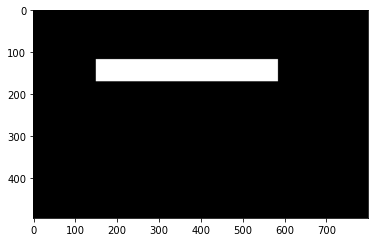

In [571]:
bboxmask = np.zeros_like(img)
if shape_chosen!="rectangle":
    cv2.rectangle(bboxmask, (starting_posx, starting_posy), (starting_posx+font_width,starting_posy+font_height), (255,255,255), -1)
else:
    cv2.rectangle(bboxmask, (starting_posx, starting_posy), (starting_posx+font_width,starting_posy+font_height), (255,255,255), -1)
# cv2.imshow("res", bboxmask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(bboxmask)

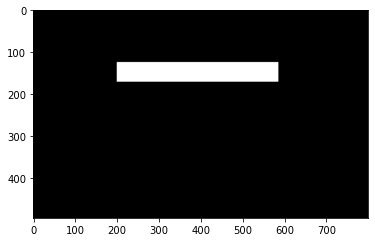

In [572]:
commonbox = cv2.bitwise_and(bboxmask,img_mask)
im_bw = cv2.cvtColor(commonbox, cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(im_bw,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
x,y,w,h = cv2.boundingRect(contours[0])
bboxmaks_adj = np.zeros_like(commonbox)
cv2.rectangle(bboxmaks_adj,(x,y),(x+w,y+h),(255,255,255),-1)
plt.imshow(bboxmaks_adj)

In [573]:
# bboxmask = np.zeros_like(img)
# if shape_chosen!="rectangle":
#     cv2.rectangle(img, (x, y), (x+w,y+h), (255,255,255), 1)
# else:
#     cv2.rectangle(img, (x, y), (x+w,y+h), (255,255,255), 1)
# cv2.imshow("res", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [574]:
# bboxmask = np.zeros_like(img)
# if shape_chosen!="rectangle":
#     cv2.rectangle(img, (starting_posx, starting_posy), (starting_posx+font_width,starting_posy+font_height), (255,255,255), 1)
# else:
#     cv2.rectangle(img, (starting_posx, starting_posy), (starting_posx+font_width,starting_posy+font_height), (255,255,255), 1)
# cv2.imshow("res", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [575]:
texturefiles = glob.glob("../input/textures/archive/dtd/images/*/*.jpg")
# print(len(textures))
texturefile = np.random.choice(texturefiles)
print(texturefile)
texture = cv2.imread(texturefile)
texture = cv2.resize(texture, (img.shape[1],img.shape[0]), interpolation = cv2.INTER_AREA)
texture = cv2.cvtColor(texture, cv2.COLOR_BGR2GRAY)
texture = cv2.cvtColor(texture, cv2.COLOR_GRAY2BGR)

maskedtexture = cv2.bitwise_and(texture,img_mask)
mu, sigma = 0.1, 0.05
s = np.random.normal(mu, sigma, 500)
s = np.abs(s)

alpha = np.random.choice(s)
print(alpha)
overlaytexture = cv2.addWeighted(maskedtexture, alpha, img, 1 - alpha,
		0, img)

cv2.imshow("texture", overlaytexture)
cv2.waitKey(0)
cv2.destroyAllWindows()

../input/textures/archive/dtd/images\braided\braided_0138.jpg
0.0649275656605004


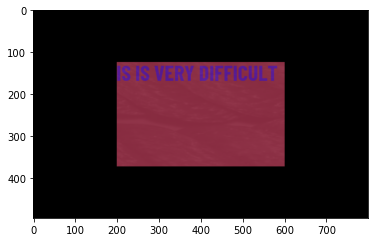

In [576]:
plt.imshow(overlaytexture)

In [577]:
bg_img.shape,w,h
# plt.imshow(bg_img)

((496, 800, 3), 385, 46)

0.53


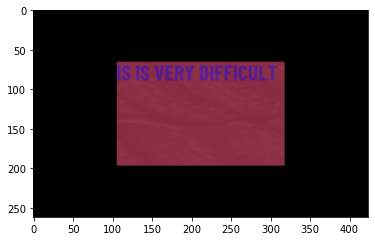

In [578]:
max_scale = min(bg_img.shape[0]/h,bg_img.shape[1]/w)
scalefactor = np.random.randint(10,max_scale*100)/100
print(scalefactor)
scaled = cv2.resize(overlaytexture,(int(bg_img.shape[1]*scalefactor),int(bg_img.shape[0]*scalefactor)), interpolation = cv2.INTER_AREA)
plt.imshow(scaled)

In [579]:
scaled_img_mask = cv2.resize(img_mask,(int(bg_img.shape[1]*scalefactor),int(bg_img.shape[0]*scalefactor)), interpolation = cv2.INTER_AREA)
scaled_bboxmaks_adj = cv2.resize(bboxmaks_adj,(int(bg_img.shape[1]*scalefactor),int(bg_img.shape[0]*scalefactor)), interpolation = cv2.INTER_AREA)


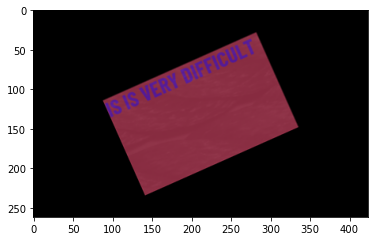

In [580]:
# Random Rotate
overlaytexture = scaled
(h__, w__) = overlaytexture.shape[:2]
center = (w__ // 2, h__ // 2)
angle = np.random.randint(-60,60)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(overlaytexture, M, (w__, h__),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
plt.imshow(rotated)

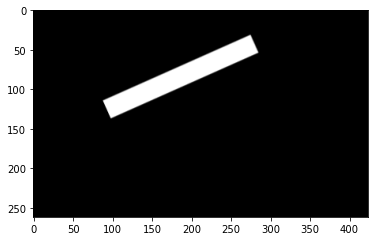

In [581]:
rotated_scaled_img_mask  = cv2.warpAffine(scaled_img_mask, M, (w__, h__),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
rotated_scaled_bboxmaks_adj = cv2.warpAffine(scaled_bboxmaks_adj, M, (w__, h__),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
plt.imshow(rotated_scaled_bboxmaks_adj)

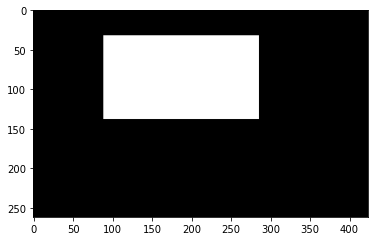

In [582]:
im_bw = cv2.cvtColor(rotated_scaled_bboxmaks_adj, cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(im_bw,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
xb,yb,wb,hb = cv2.boundingRect(contours[0])
reboxed_rotated_scaled_bboxmaks_adj = np.zeros_like(rotated_scaled_bboxmaks_adj)
cv2.rectangle(reboxed_rotated_scaled_bboxmaks_adj,(xb,yb),(xb+wb,yb+hb),(255,255,255),-1)
plt.imshow(reboxed_rotated_scaled_bboxmaks_adj)

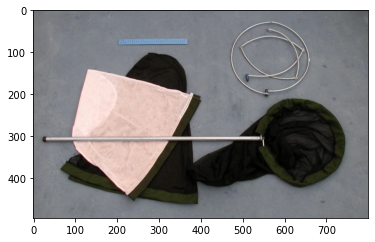

In [583]:
plt.imshow(bg_img)

(81, 439)


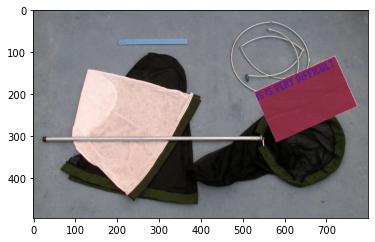

In [584]:
bkbg_img = bg_img[:,:,:].copy()
mask_bkbg_img = np.zeros_like(bkbg_img)

start_position = (np.random.randint(0,bkbg_img.shape[0]-yb-hb),np.random.randint(0,bkbg_img.shape[1]-xb-wb))
# start_position = (0,0)
# start_position = (700,10)# (631, 1271) (638, 1503)
# start_position=(bkbg_img.shape[0]-yb-hb,bkbg_img.shape[1]-xb-wb)
print(start_position)
roi = bkbg_img[start_position[0]:start_position[0]+rotated.shape[0],start_position[1]:start_position[1]+rotated.shape[1],:]
mask_roi = mask_bkbg_img[start_position[0]:start_position[0]+rotated.shape[0],start_position[1]:start_position[1]+rotated.shape[1],:]
fg_ = cv2.bitwise_and(rotated[:,:,:3],rotated[:,:,:3],mask=rotated_scaled_img_mask[:,:,0])
mask_fg_ = cv2.bitwise_and(reboxed_rotated_scaled_bboxmaks_adj[:,:,:3],reboxed_rotated_scaled_bboxmaks_adj[:,:,:3],mask=reboxed_rotated_scaled_bboxmaks_adj[:,:,0])
# roi = cv2.bitwise_and(roi,roi,mask=cv2.bitwise_not(rotated_scaled_img_mask[:,:,0]))
roi = cv2.bitwise_and(roi,roi,mask=cv2.bitwise_not(rotated_scaled_img_mask[:roi.shape[0],:roi.shape[1],0]))
mask_roi = cv2.bitwise_and(mask_roi,mask_roi,mask=cv2.bitwise_not(reboxed_rotated_scaled_bboxmaks_adj[:mask_roi.shape[0],:mask_roi.shape[1],0]))
dst = cv2.add(roi,fg_[:roi.shape[0],:roi.shape[1],:])
mask_dst = cv2.add(mask_roi,mask_fg_[:mask_roi.shape[0],:roi.shape[1],:])
bkbg_img[start_position[0]:start_position[0]+rotated.shape[0],start_position[1]:start_position[1]+rotated.shape[1],:] = dst
mask_bkbg_img[start_position[0]:start_position[0]+rotated.shape[0],start_position[1]:start_position[1]+rotated.shape[1],:] = mask_dst
plt.imshow(bkbg_img)

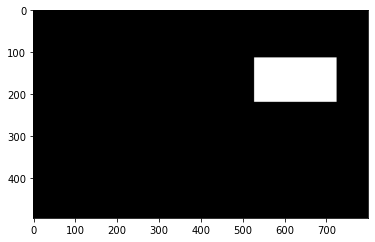

In [585]:
plt.imshow(mask_bkbg_img)

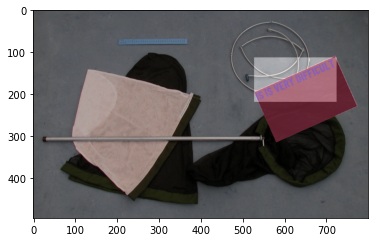

In [586]:
bkbg_img_bb = bkbg_img.copy()
alpha=0.3
output = cv2.addWeighted(mask_bkbg_img, alpha, bkbg_img, 1 - alpha,
		0, bkbg_img)
plt.imshow(output)        
# scaled_bboxmaks_adj.shape,bkbg_img_bb.shape